# Setup

In [1]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# Run experiments

In [62]:
base_exp_info = {
    'EXPERIMENT_NAME': 'better_non_expert_algos',    
    
    'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'],
    # Expert demo parameters
    'DATASET': 'COMPAS',
    'TARGET_DATASET': 'Adult',
    'N_EXPERT_DEMOS': 3,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 25_000,
    # IRL Loop parameters
    'N_TRIALS': 12,
    'IRL_METHOD': None,
    'EPSILON': .03,
    'MAX_ITER': 6,
    'METHOD': 'highs',
    'IRL_ERROR_NORM_WEIGHTS': False,
    # Plotting parameters
    'NOISE_FACTOR': .02,
    'ANNOTATE': True,
}

In [57]:
experiments = [
    {
        'EXPERT_ALGO': 'OptAcc',
        'IRL_METHOD': 'FairIRL',
        'N_INIT_POLICIES': 4,
        'NON_EXPERT_ALGOS': [
            'OptAcc',
            'HardtDemPar',
            'HardtEqOpp',
            'Dummy',
        ],
    },
    {
        'EXPERT_ALGO': 'HardtDemPar',
        'IRL_METHOD': 'FairIRL',
        'N_INIT_POLICIES': 4,
        'NON_EXPERT_ALGOS': [
            'OptAcc',
            'HardtDemPar',
            'HardtEqOpp',
            'Dummy',
        ],
    },
    {
        'EXPERT_ALGO': 'HardtEqOpp',
        'IRL_METHOD': 'FairIRL',
        'N_INIT_POLICIES': 4,
        'NON_EXPERT_ALGOS': [
            'OptAcc',
            'HardtDemPar',
            'HardtEqOpp',
            'Dummy',
        ],
    },
]

In [47]:
for exp_i, experiment in enumerate(experiments):
    logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    run_experiment(exp_info)

INFO:root:


INFO:root:EXPERIMENT 1/3
INFO:root:exp_info: {'EXPERIMENT_NAME': 'better_non_expert_algos', 'OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'Boston', 'TARGET_DATASET': 'COMPAS', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'OptAcc', 'N_DATASET_SAMPLES': 25000, 'N_TRIALS': 12, 'IRL_METHOD': 'FairIRL', 'EPSILON': 0.03, 'MAX_ITER': 6, 'METHOD': 'highs', 'IRL_ERROR_NORM_WEIGHTS': False, 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 4, 'NON_EXPERT_ALGOS': ['OptAcc', 'HardtDemPar', 'HardtEqOpp', 'Dummy']}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.78584283 0.69263628 0.77234559]
 [0.78817882 0.67267085 0.75803775]
 [0.79207921 0.7203018  0.83705864]]
INFO:root:muE_hold:
[[0.79904019 0.70165548 0.80839633]
 [0.79064187 0.69809286 0.76229781]
 [0.77911164 0.66364008 0.73449594]]
INFO:root:muL:
[[0.79848485 0.70775469 0.85290497]
 [0.74272727 0.99591431 0.97852493]
 [0.75727273 0.95817686 0.98300821]
 [0.51181818 0.96105665 0.94184104]]
INFO:root:	IRL Loop iteration 1/6 

,Acc,DemPar,EqOpp,is_expert,muL_best_Acc,muL_hold_Acc,muL_best_hold_Acc,muL_best_DemPar,muL_hold_DemPar,muL_best_hold_DemPar,muL_best_EqOpp,muL_hold_EqOpp,muL_best_hold_EqOpp,is_init_policy,learn_idx,Acc_weight,DemPar_weight,EqOpp_weight,t,t_hold,mu_delta_l2norm,mu_delta_l2norm_hold
0,0.786,0.693,0.772,1,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
1,0.788,0.673,0.758,1,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
2,0.792,0.720,0.837,1,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,0.0,-1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
3,0.798,0.708,0.853,0,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,1.0,0.0,0.000,0.000,0.000,inf,inf,0.0,0.0
4,0.743,0.996,0.979,0,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,1.0,1.0,0.000,0.000,0.000,inf,inf,0.0,0.0
5,0.757,0.958,0.983,0,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,1.0,2.0,0.000,0.000,0.000,inf,inf,0.0,0.0
6,0.512,0.961,0.942,0,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.000,0.000,1.0,3.0,0.000,0.000,0.000,inf,inf,0.0,0.0
7,0.586,0.685,0.750,0,0.586,0.587,0.587,0.685,0.69,0.69,0.75,0.741,0.741,0.0,4.0,0.012,0.267,-0.721,0.029,0.02,0.0,0.0


INFO:root:muE_target:
[[0.58436214 0.7687298  0.79263746]
 [0.61934156 0.64499484 0.67026998]
 [0.62002743 0.6927981  0.69201566]]
INFO:root:target domain muL = [0.529 0.912 0.657]
INFO:root:target domain muE = [0.608 0.702 0.718]
INFO:root:target domain muL_hold = [0.546 0.918 0.659]
INFO:root:

TRIAL 1



KeyboardInterrupt: 

# Compare results with source domain only

In [48]:
!rm ../../data/experiment_output/fair_irl/exp_info/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_results/.DS_Store

rm: ../../data/experiment_output/fair_irl/exp_info/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_results/.DS_Store: No such file or directory


In [64]:
min_exp_timestamp = '2023-06-21 00:00:00'

def skip_by_name(info):
    return 'EXPERIMENT_NAME' not in info or info['EXPERIMENT_NAME'] != base_exp_info['EXPERIMENT_NAME']

DATASET: COMPAS


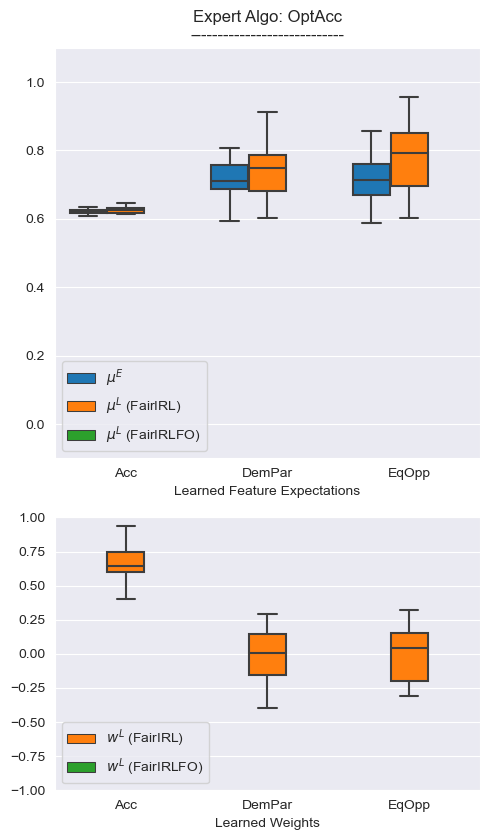

In [65]:
mu_df, w_df = plot_results_source_domain_only(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='OptAcc',
    dataset=base_exp_info['DATASET'],
    mu_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
)

DATASET: COMPAS


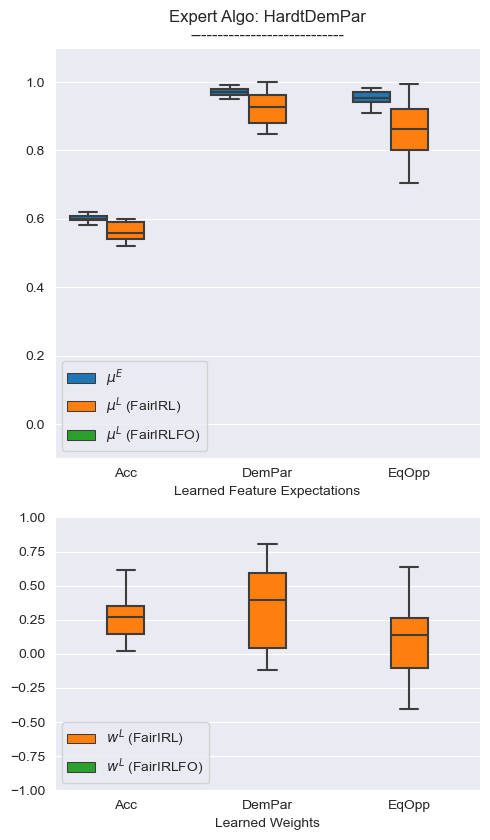

In [66]:
mu_df, w_df = plot_results_source_domain_only(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtDemPar',
    dataset=base_exp_info['DATASET'],
    mu_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
)

DATASET: Boston


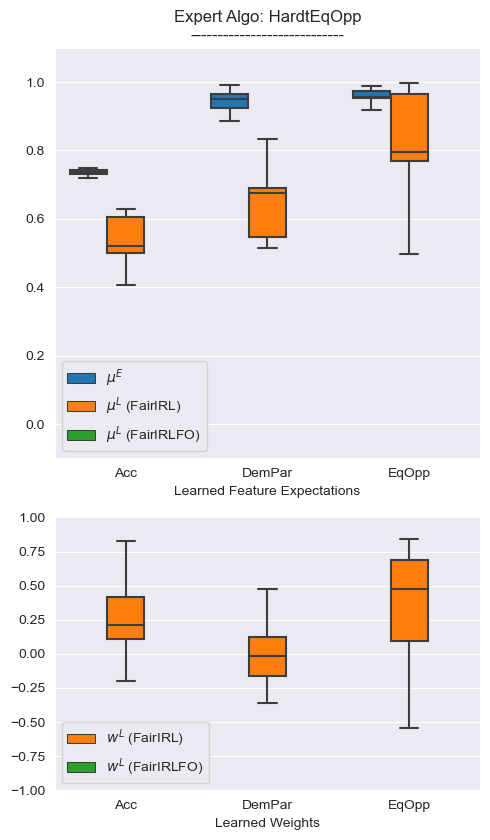

In [60]:
mu_df, w_df = plot_results_source_domain_only(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtEqOpp',
    dataset=base_exp_info['DATASET'],
    mu_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
)

# Compare results with target domain

In [61]:
mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='OptAcc',
    dataset=base_exp_info['DATASET'],
    target_dataset=base_exp_info['TARGET_DATASET'],
    mu_noise_factor=.1,
    w_noise_factor=.01,
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
)

TypeError: plot_results_target_domain() got an unexpected keyword argument 'dataset'

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


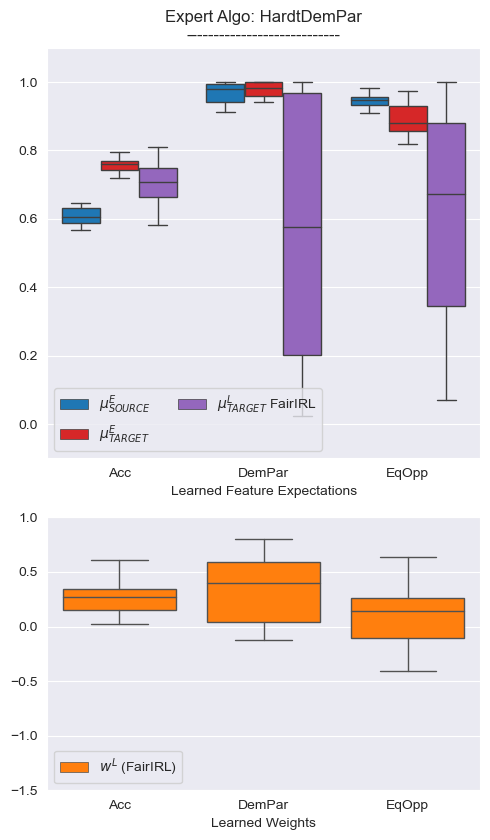

In [41]:
mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtDemPar',
    source_dataset='COMPAS',
    target_dataset=base_exp_info['TARGET_DATASET'],
    mu_noise_factor=.1,
    w_noise_factor=.01,
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
)

SOURCE DATASET: COMPAS
TARGET DATASET: Adult


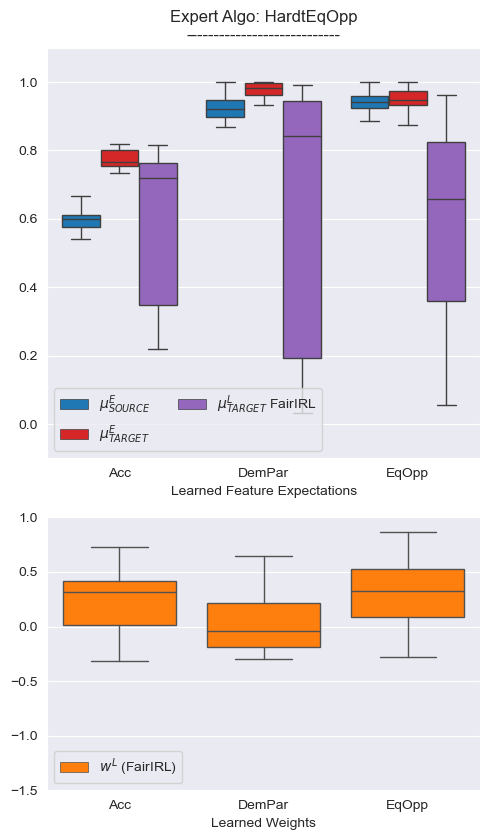

In [42]:
mu_df, w_df = plot_results_target_domain(
    objective_set_names=['Acc', 'DemPar', 'EqOpp'],
    expert_algo='HardtEqOpp',
    source_dataset='COMPAS',
    target_dataset=base_exp_info['TARGET_DATASET'],
    mu_noise_factor=.1,
    w_noise_factor=.01,
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
)

# Scratch